In [7]:
import pandas as pd
from Class_Source import MachineLearning
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor , RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

df = pd.read_csv("electronics_product.csv")
cols_to_drop=["Unnamed: 0" , "name" , "link" , "image" , "main_category" , "sub_category"]
df = df.drop(columns=cols_to_drop)

# Fix Some Numeric Columns

df["ratings"] = pd.to_numeric(df["ratings"], errors="coerce")

df["no_of_ratings"] = df["no_of_ratings"].str.replace(",", "")
df["no_of_ratings"] = pd.to_numeric(df["no_of_ratings"],errors="coerce")

df["discount_price"] = df["discount_price"].str.replace("₹", "")
df["discount_price"] = df["discount_price"].str.replace(",", "")
df["discount_price"] = pd.to_numeric(df["discount_price"],errors="coerce")

df["actual_price"] = df["actual_price"].str.replace("₹", "")
df["actual_price"] = df["actual_price"].str.replace(",", "")
df["actual_price"] = pd.to_numeric(df["actual_price"],errors="coerce")

# Feature Engineering

df['price_diff'] = df['actual_price'] - df['discount_price']
df['price_per_rating'] = df['actual_price'] / (df['no_of_ratings'] + 1)
bins = [0, 849, 1490, 3299, 7236]
labels = ['very_low', 'low', 'medium', 'high']

df['price_category'] = pd.cut(df['actual_price'], bins=bins, labels=labels, include_lowest=True)



-------------------------------------------
                 DataFrame                 
-------------------------------------------
Target: actual_price

-------------------------------------------
                    HEAD                   
-------------------------------------------
   ratings  no_of_ratings  discount_price  actual_price  price_diff  \
0      4.0          965.0         10999.0       18999.0      8000.0   
1      4.3       113956.0         18999.0       19999.0      1000.0   
2      4.2        90304.0          1999.0        2299.0       300.0   
3      4.1        24863.0         15999.0       24999.0      9000.0   
4      4.3       113956.0         18999.0       19999.0      1000.0   

   price_per_rating price_category  
0         19.667702            NaN  
1          0.175496            NaN  
2          0.025458         medium  
3          1.005430            NaN  
4          0.175496            NaN   

-------------------------------------------
                   

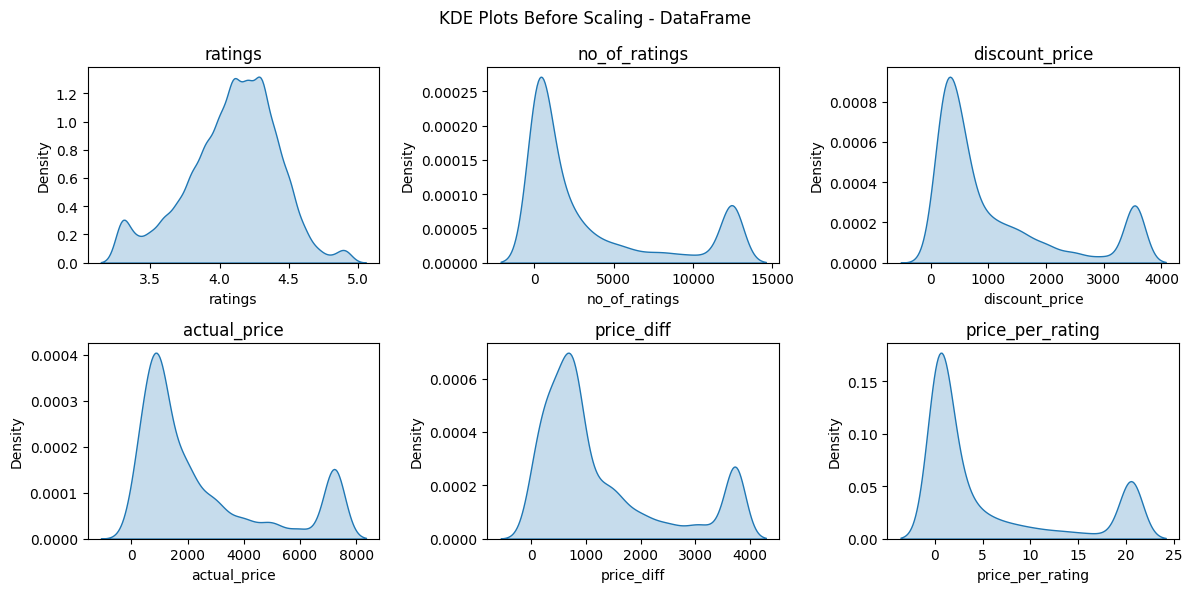

After scaling - DataFrame
ratings: mean=0.00, std=1.00
no_of_ratings: mean=0.00, std=1.00
discount_price: mean=-0.00, std=1.00
actual_price: mean=2456.92, std=2320.70
price_diff: mean=0.00, std=1.00
price_per_rating: mean=-0.00, std=1.00



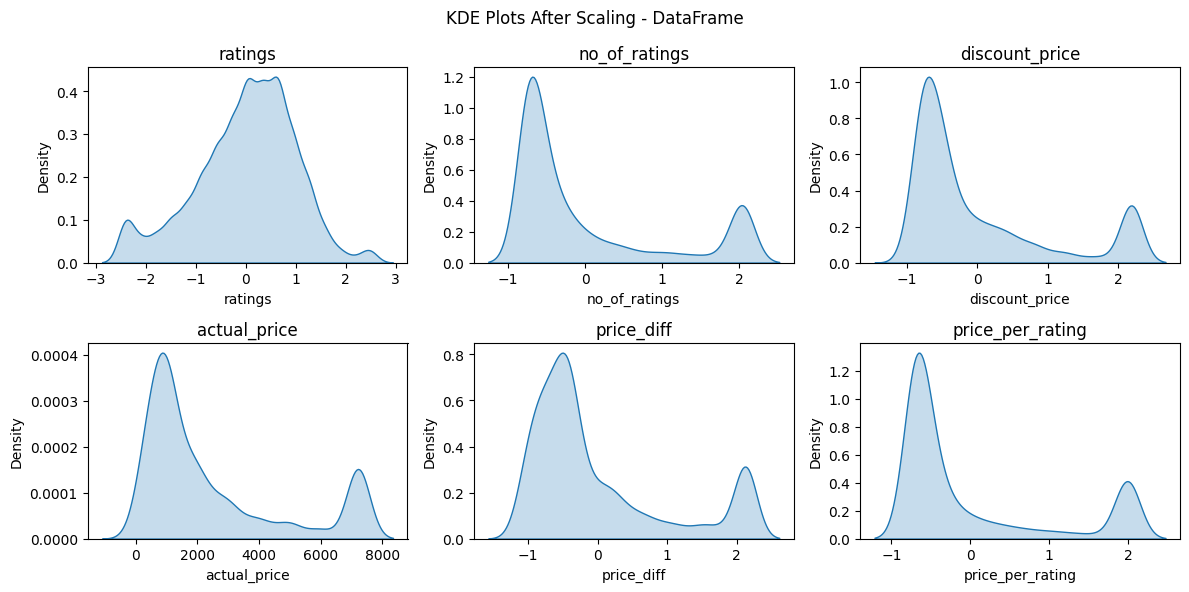

-------------------------------------------
  ENCODE CATEGORICAL VARIABLES - DataFrame 
-------------------------------------------
before encoding categorical variables in DataFrame, shape: (9600, 7)

Encoded 'price_category' using ordinal encoding in DataFrame with order: ['very_low', 'low', 'medium', 'high']

After encoding categorical variables in DataFrame, shape: (9600, 7)
-------------------------------------------
                 SPLIT DATA                
-------------------------------------------
Data split into train and test sets with test size 0.2.
make apply = True if NEEDS PCA?:
-------------------------------------------
                PCA CANCELED               
-------------------------------------------
-------------------------------------------
              MODEL SELECTION              
-------------------------------------------

Linear Regression | mean_squared_error:
  CV fold scores: [108266.89340338 203908.28402369  62143.13814343  42938.4183607
 105017.44

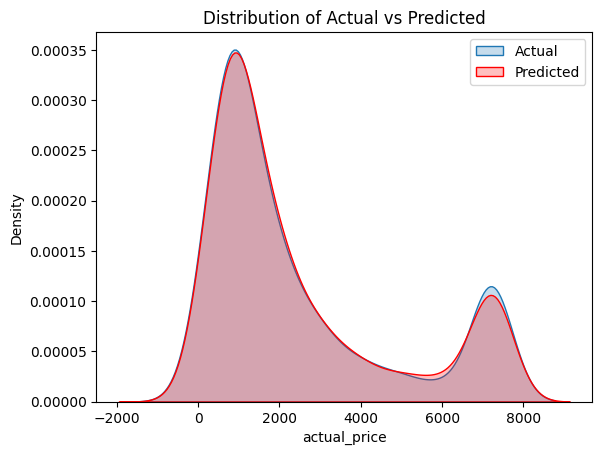

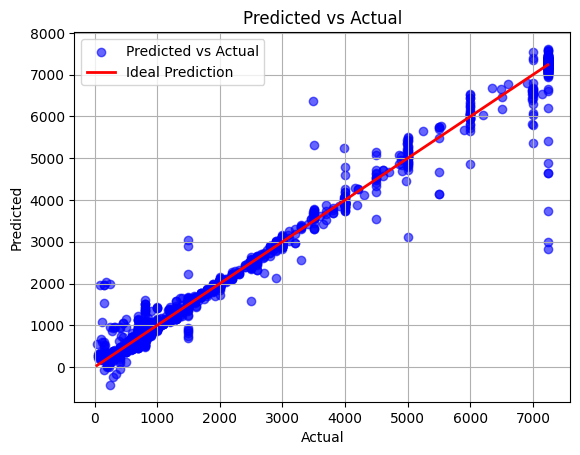

In [8]:
project = MachineLearning(df=df , target='actual_price' , classification=False)
# --------------Display Data----------------
project.display_data()
# --------------Outliers Handling---------------------
project.remove_outliers(technique="iqr" , apply=True , box_plot=False)
# --------------Missing Values Handling----------------
project.handle_missing_values(impute_strategy="median")
#---------------Show Missing Values----------------
project.null_values_shows()
# --------------Feature Scaling----------------
project.scaling_features(scaling_method="standard")
#---------------Encoding Categorical Features----------------
ordinal_col = {"price_category": ['very_low', 'low', 'medium', 'high']}
project.encode_categorical_variables(ordinal_encoding_cols=ordinal_col)
# --------------Split Data----------------
project.split_data(classification=False , test_size=0.2 , random_state=42)
# --------------Feature Selection----------------
project.pca(apply=False)
# --------------Model Implementation--------------
linR_3 = Pipeline([
    ('poly', PolynomialFeatures(degree=4 , include_bias=False)),
    ('model', LinearRegression(fit_intercept=True))
])
# ---------------Model Dictionary----------------
models_dict = {
    "Linear Regression": linR_3
}
# ---------------Model Selection(Cross Validation)----------------
project.model_selection(models_dict=models_dict, print_results=True , ascending=True ,scoring="neg_mean_squared_error" , cv=10)
# ---------------Model Training & Evaluation----------------
project.model_Training_evaluation(models_dict=models_dict , classification=False , classification_report=False)
# ---------------Model Visualization----------------
project.model_visualization(models_dict=models_dict , classification=False)
